In [105]:
import pandas as pd
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
import datetime
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
 
# def parser(x):
#  return datetime.strptime('190'+x, '%Y-%m')
 
series = pd.read_csv('data.csv')

In [106]:
backshift = series.shift(-1)
print(backshift)

                           Date     Close
0     2010-01-05 00:00:00-05:00  3.162582
1     2010-01-06 00:00:00-05:00  3.156426
2     2010-01-07 00:00:00-05:00  3.145972
3     2010-01-08 00:00:00-05:00  3.152845
4     2010-01-11 00:00:00-05:00  3.140043
...                         ...       ...
3015  2021-12-27 00:00:00-05:00  5.824298
3016  2021-12-28 00:00:00-05:00  5.820787
3017  2021-12-29 00:00:00-05:00  5.822836
3018  2021-12-30 00:00:00-05:00  5.815116
3019                        NaN       NaN

[3020 rows x 2 columns]


In [107]:
diff = backshift['Close'] - series['Close']
diff = diff.dropna()

In [108]:
print(diff)

0       0.000323
1      -0.006156
2      -0.010454
3       0.006873
4      -0.012802
          ...   
3014    0.004462
3015    0.022921
3016   -0.003510
3017    0.002049
3018   -0.007721
Name: Close, Length: 3019, dtype: float64


<AxesSubplot:xlabel='Close', ylabel='Count'>

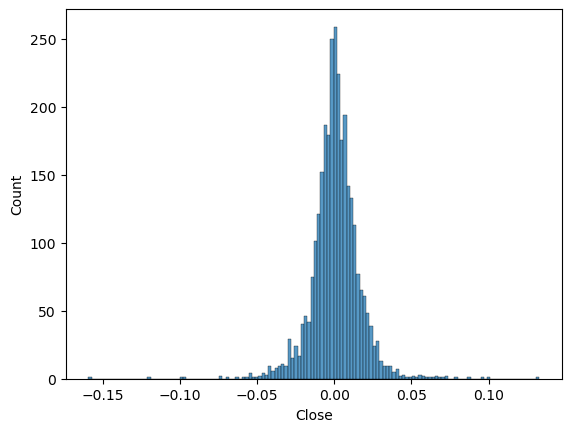

In [109]:
import seaborn as sns

sns.histplot(diff)

f:\Conda\envs\ml\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


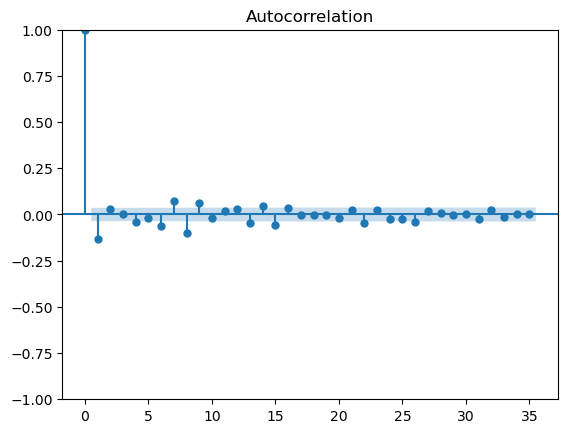

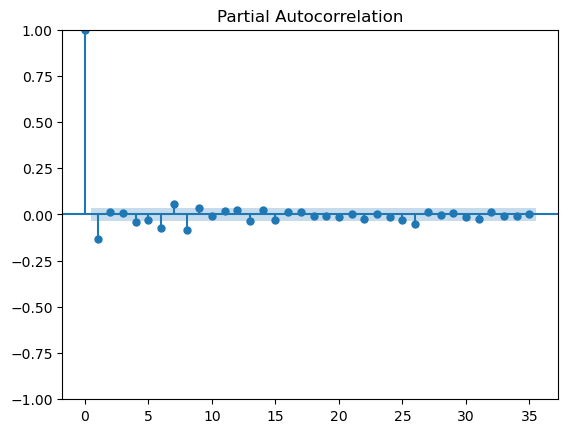

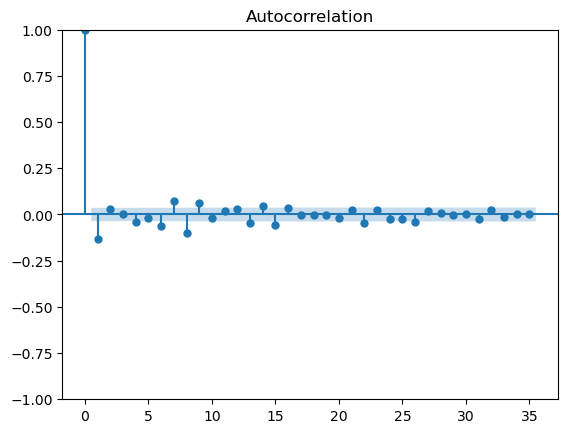

In [110]:
plot_pacf(diff)
plot_acf(diff)

In [111]:
series = series['Close'].values

In [112]:
series = diff.values

In [113]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
train = series[:len(series) * 9 // 10]
test = series[len(series) * 9 // 10:]

In [114]:
print(train)
print(len(train))

[ 0.00032322 -0.00615593 -0.01045434 ... -0.00544832  0.
 -0.02507732]
2717


In [115]:
print(test)

[ 2.00523350e-03  6.98575430e-04  4.18882076e-04  6.21649636e-03
 -2.88542585e-02  1.49767725e-02 -5.08368818e-02  1.00148110e-02
 -1.10514290e-02 -6.91598990e-04  2.00612512e-02  4.71209773e-02
  3.13890189e-02  1.92385957e-03 -2.41128039e-02 -3.43768740e-02
  2.59158965e-02 -5.13895819e-03  4.95432525e-03  3.31991312e-03
 -1.28334363e-02 -1.32714645e-02  6.32822245e-03 -9.60250573e-03
 -1.33170608e-03  1.76904390e-02  4.66659899e-05  6.33896004e-03
 -5.40420623e-03  9.94710471e-03 -3.89277200e-03 -5.26041299e-03
  5.60017579e-04 -3.26832560e-04  7.99457453e-03 -1.96823579e-02
 -6.06172885e-03  1.29314139e-02  4.39812257e-03 -3.26931349e-04
  2.37661319e-02  6.38335718e-04 -3.78984135e-03  1.81336062e-02
  6.04674984e-03 -1.31250384e-02  7.79688793e-03  9.87249126e-03
 -3.60707607e-03 -1.10806567e-02  3.33258592e-03 -2.14953946e-02
  9.64161225e-04 -2.62713656e-02  2.80595391e-02  6.07447212e-03
 -9.74586616e-03 -1.18405359e-02  6.53884219e-03 -1.54653510e-02
 -1.73836326e-03  1.76658

In [116]:
model = ARIMA(train, order = (10, 0, 0))

In [117]:
model_fit = model.fit()

In [118]:
output = model_fit.forecast()

In [119]:
history = [x for x in train]

In [120]:
from sklearn.metrics import mean_squared_error

predicted=0.008148, expected=0.002005
predicted=0.000654, expected=0.000699


f:\Conda\envs\ml\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.003975, expected=0.000419
predicted=0.004476, expected=0.006216
predicted=0.003940, expected=-0.028854
predicted=0.002901, expected=0.014977
predicted=-0.007960, expected=-0.050837
predicted=-0.002268, expected=0.010015
predicted=-0.010077, expected=-0.011051
predicted=-0.009166, expected=-0.000692
predicted=-0.004798, expected=0.020061
predicted=-0.009438, expected=0.047121
predicted=0.002146, expected=0.031389
predicted=-0.004260, expected=0.001924
predicted=0.011562, expected=-0.024113
predicted=-0.002163, expected=-0.034377
predicted=0.001717, expected=0.025916
predicted=-0.006709, expected=-0.005139
predicted=0.007041, expected=0.004954
predicted=0.006567, expected=0.003320
predicted=0.007780, expected=-0.012833
predicted=0.010427, expected=-0.013271
predicted=0.003805, expected=0.006328
predicted=0.000902, expected=-0.009603
predicted=-0.009143, expected=-0.001332
predicted=-0.004011, expected=0.017690
predicted=-0.004791, expected=0.000047
predicted=0.002734, expecte

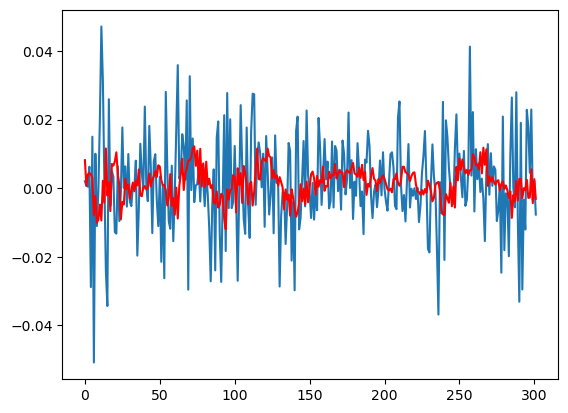

In [121]:
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(10,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

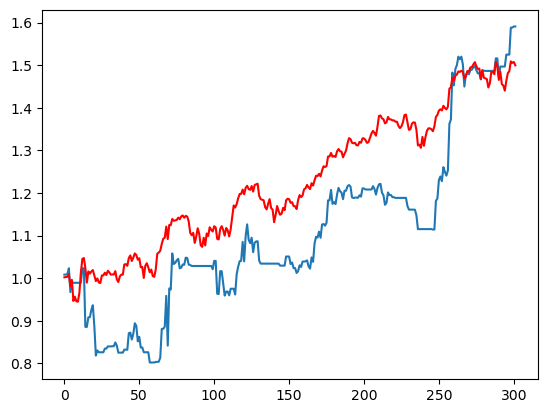

In [152]:
import math

initial = 1
naivev = 1
retGraph = []
naive = []
alpha = 500
for i in range(len(test)):
    ret = math.exp(test[i]) - 1
    weight = alpha * predictions[i]
    if(abs(predictions[i] > 0.000)):
        initial += weight * ret
    # if(predictions[i] > 0):
    #     initial += -predictions[i] * 1000 + predictions[i] * 1000 * ret;
    # else:
    #     initial += predictions[i] * 1000 - predictions[i] * 1000 * ret;
    naivev += ret
    retGraph.append(initial)
    naive.append(naivev)
    
pyplot.plot(retGraph)
pyplot.plot(naive, color='red')
pyplot.show()